<a href="https://colab.research.google.com/github/GauravPatel89/EVA-Track3-Assignments/blob/master/Session3/Session3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

Following block installs keras in current runtime


In [0]:
# https://keras.io/
!pip install -q keras
import keras

Import the different packages to use in our code.

Last line imports the MNIST dataset

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint,Callback

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Load MNIST dataset

X_train - input training data

y_train - training outputs corresponding to X_train

X_test - input testing data

y_test - testing outputs corresponding to X_test

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Print the size of X_train.

-Size of training set is 60000 images of size 28x28

-Show first input training image.

(60000, 28, 28)


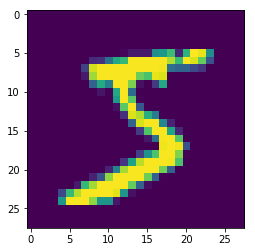

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Change the size of X_train and X_test from 60000x28x28 to 60000x28x28x1
We are adding one more level of dimension to the input. 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Right now dataset loaded is of type uint8. Each pixel is integer of size 8 bit. We first convert training data to float of size 32 bits.

To normalize the image data we divide whole data by 255 i.e. highest 8bit value for a pixel. After the division all the pixel values are between 0.0 and 1.0 float32.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Print first 10 output classes for training dataset.

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert training and test output from simple class number to 'one hot encoding'. In this encoding we have as many bits as the number of classes.We have binary '1' for bit number corresponding to the class of the input. For other classes we have '0'.

eg. '5' == '0 0 0 0 1 0 0 0 0 0' ; '10' == '0 0 0 0 0 0 0 0 0 1'

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]           # print the first 10 training outputs

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Create Network model

Convolution2D(n,k,k,'activation=aa') means convolution layer with **'n'** kernels of size **kxk** with activation model  **'aa'**.

For the first layer we also provide input shape 28x28x1 as we have 28x28 image with single channel.


MaxPooling2D(pool_size=(2, 2)) means maxPooling layer of size 2x2.

In [0]:
from keras.layers import Activation
model = Sequential()

                                                                              # input is 28x28x1         Receptive Field = 1x1
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))  # Receptive Field = 3x3    i/p  = 28x28x1    kernel = (3x3x1)x10     o/p = 26x26x10
model.add(Convolution2D(16, 3, 3, activation='relu'))                         # Receptive Field = 5x5    i/p  = 26x26x10   kernel = (3x3x10)x16    o/p = 24x24x16
model.add(MaxPooling2D(pool_size=(2, 2)))                                     # Receptive Field = 10x10  i/p  = 24x24x16   MaxPooling of 2x2       o/p = 12x12x16
model.add(Convolution2D(10, 1, activation='relu'))                            # Receptive Field = 10x10  i/p  = 12x12x16   kernel = (1x1x16)x10    o/p = 12x12x10
model.add(Convolution2D(16, 3, 3, activation='relu'))                         # Receptive Field = 12x12  i/p  = 26x26x10   kernel = (3x3x10)x16    o/p = 10x10x16
model.add(Convolution2D(24, 3, 3, activation='relu'))                         # Receptive Field = 14x14  i/p  = 10x10x16   kernel = (3x3x16)x24    o/p = 8x8x24
model.add(Convolution2D(32, 3, 3, activation='relu'))                         # Receptive Field = 16x16  i/p  = 8x8x24     kernel = (3x3x24)x32    o/p = 6x6x32
model.add(Convolution2D(16, 1, activation='relu'))                            # Receptive Field = 16x16  i/p  = 6x6x32     kernel = (1x1x32)x16    o/p = 6x6x16
model.add(Convolution2D(19, 3, 3, activation='relu'))                         # Receptive Field = 18x18  i/p  = 6x6x16     kernel = (3x3x16)x19    o/p = 4x4x19
model.add(Convolution2D(10, 4))                                               # Receptive Field = 21x21  i/p  = 6x6x19     kernel = (4x4x19)x10    o/p = 1x1x10
model.add(Flatten())                                                          # flatten the 1x1x10 array into 10x1 array
model.add(Activation('softmax'))                                              # apply the softmax function to obtain classification weights

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/l

In [0]:
model.summary()    # Show model information like layers, outputs, number of parameters

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 24)          3480      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 32)         

In [0]:
#following code is to stop the model training at some specified validaton accuracy
class EarlyStoppingByAccuracy(Callback):
    def __init__(self, monitor='accuracy', value=0.99, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [0]:
# compile the model by specifyinng the optimizer, loss function, and training metrics to be used
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

es = EarlyStoppingByAccuracy(monitor='val_acc', value=0.994, verbose=1)



In [0]:
#start the model training with test sample validation after each epoch. Use batch size as 32 and number of epochs as 50
#use callback to stop the model training once the validation accuracy reaches 0.994
model.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=32, nb_epoch=50, verbose=1,callbacks=[es])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 22s 374us/step - loss: 0.2464 - acc: 0.9213 - val_loss: 0.0743 - val_acc: 0.9756
Epoch 2/50
60000/60000 [==============================] - 22s 363us/step - loss: 0.0763 - acc: 0.9766 - val_loss: 0.0580 - val_acc: 0.9836
Epoch 3/50
60000/60000 [==============================] - 22s 362us/step - loss: 0.0570 - acc: 0.9824 - val_loss: 0.0444 - val_acc: 0.9868
Epoch 4/50
60000/60000 [==============================] - 22s 364us/step - loss: 0.0467 - acc: 0.9858 - val_loss: 0.0712 - val_acc: 0.9791
Epoch 5/50
60000/60000 [==============================] - 22s 363us/step - loss: 0.0409 - acc: 0.9873 - val_loss: 0.0427 - val_acc: 0.9876
Epoch 6/50
60000/60000 [==============================] - 22s 363us/step - loss: 0.0339 - acc: 0.9892 - val_loss: 0.0473 - val_acc: 0.9858
Epoch 7/50
60000/60000 [==============================] - 22s 365us/step - loss: 0.0308 - acc: 0.9904 - val_loss: 0.

I experimented with various model layers, batch size and number of epochs. Once I finalised this particular model, while training I observed that 
with smaller batch sizes, although training time was large model was reaching validation accuracy of as high as 99.2 % (epoch 21) in lesser epochs.
Once that kind of accuracy is reached when I trained the network further with larger batch size and very large number of epochs, I could consistently achieve validation accuracy of 99.3% and more. Here in this file I could reach highest accuracy of 99.34% (Epoch 60). I could not improve the validation accuracy any further although the training accuracy reached 100 %. 


In [0]:
model.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=1024, nb_epoch=500, verbose=1,callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
 3072/60000 [>.............................] - ETA: 3s - loss: 0.0022 - acc: 0.9993

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 46us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0488 - val_acc: 0.9913
Epoch 2/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0474 - val_acc: 0.9914
Epoch 3/500
60000/60000 [==============================] - 3s 44us/step - loss: 7.3791e-04 - acc: 0.9999 - val_loss: 0.0469 - val_acc: 0.9917
Epoch 4/500
60000/60000 [==============================] - 3s 43us/step - loss: 5.8488e-04 - acc: 1.0000 - val_loss: 0.0466 - val_acc: 0.9915
Epoch 5/500
60000/60000 [==============================] - 3s 43us/step - loss: 5.1581e-04 - acc: 1.0000 - val_loss: 0.0465 - val_acc: 0.9918
Epoch 6/500
60000/60000 [==============================] - 3s 43us/step - loss: 4.7329e-04 - acc: 1.0000 - val_loss: 0.0464 - val_acc: 0.9918
Epoch 7/500
60000/60000 [==============================] - 3s 44us/step - loss: 4.4347e-04 - acc: 1.0000 - val_loss: 0.0464 - val_acc: 0.9918
Epoch 8/500
60000/60000 [=

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)         # Test the trained model on test data and print the results

In [0]:
print(score)

[0.06328659316992874, 0.9933]


In [0]:
y_pred = model.predict(X_test)                           # Apply the model on test data to generate classification outputs

In [0]:
print(y_pred[:9])                                        # Print predicted and ground truth outputs
print(y_test[:9])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.27679267e-36 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.03820820e-34 0.00000000e+00 1.06239795e-36
  2.41566233e-37 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.11893159e-28 0.00000000e+00
  3.85055689e-36 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.16090538e-23]
 [0.00000000e+00 1.00000000e+00 1.55011258e-38 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.45051687e-33
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Display one of the input image and along with ouputs of specified layer channel to compare them.

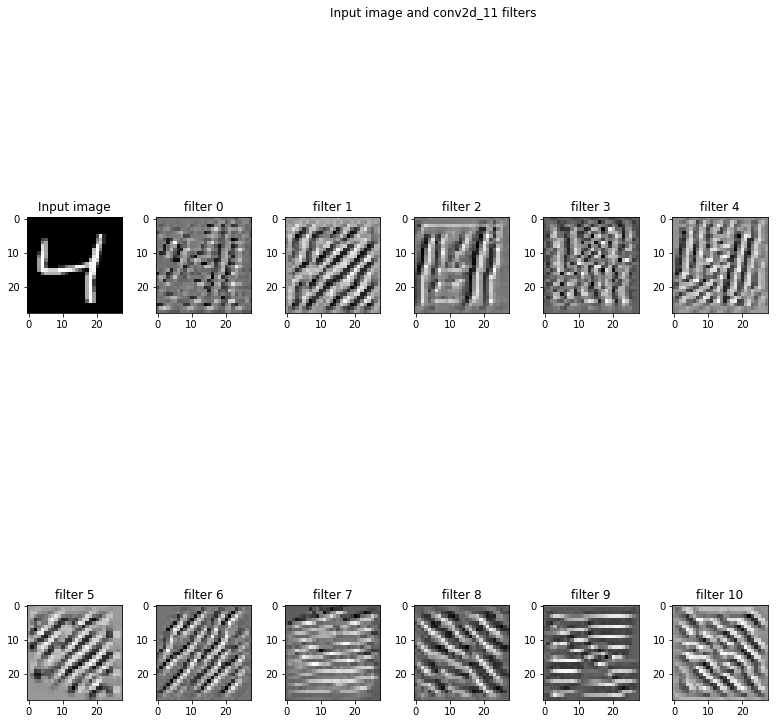

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name = 'conv2d_11')